## Load embNet and Predict emb_vec for each image

In [11]:
from keras.models import load_model
embNet = load_model('./model/embNet_a.h5')

/home/inouelab/anaconda3/envs/keras/lib/python3.5/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [12]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [13]:
dir_path = './nogi_imgs/test/'
files = [f for f in sorted(os.listdir(dir_path))]
files.remove('.DS_Store')

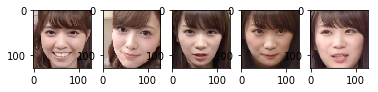

In [14]:
emb_vec = np.zeros((len(files),1024))
for i,file in enumerate(files):
    file = plt.imread('{}{}'.format(dir_path,file))
    plt.subplot(1,len(files),i+1)
    plt.imshow(file)
    emb_vec[i] = embNet.predict(np.expand_dims(file,axis=0))[0] # need [0] because of expanding dimension -> [[]]
plt.show()

In [15]:
emb_vec.shape

(5, 1024)

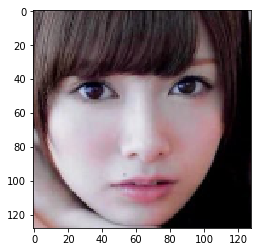

In [16]:
test_img = plt.imread('./nogi_imgs/shiraishi/inputImage2_0.png')
plt.imshow(test_img)
plt.show()
test_emb = embNet.predict(np.expand_dims(test_img,axis=0))[0]

In [17]:
test_emb.shape

(1024,)

## Retrieve the Nearest one(Calcurate L2 Norm same as Loss function)

In [18]:
import scipy.spatial.distance as dis
from keras import backend as K # calcurate by Keras (= training loss)

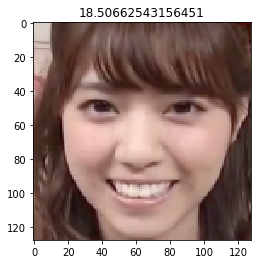

In [19]:
similarities = np.ones(len(emb_vec))
for i,e in enumerate(emb_vec):
#     similarities[i] = dis.cosine(test_emb,e)
#     similarities[i] = K.sum(K.square(np.expand_dims(test_emb,axis=0)-np.expand_dims(e,axis=0)), axis=-1)[0]
    similarities[i] = np.linalg.norm(test_emb-e)
min_idx = np.argmin(similarities)

nearest = plt.imread('{}{}'.format(dir_path,files[min_idx]))
plt.imshow(nearest)
plt.title('{}'.format(similarities[min_idx]))
plt.show()

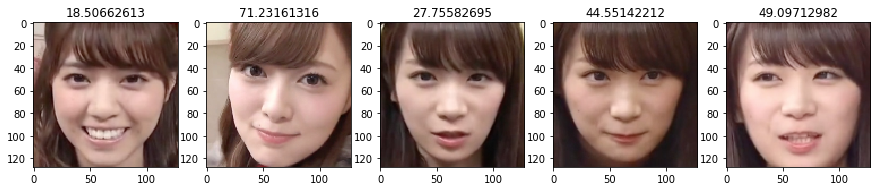

In [20]:
plt.subplots_adjust(wspace=2, hspace=2)
plt.figure(figsize=(15,15))
for i,file in enumerate(files):
    file = plt.imread('{}{}'.format(dir_path,file))
    plt.subplot(1,len(files),i+1)
    plt.imshow(file)
    emb_vec = embNet.predict(np.expand_dims(file,axis=0))[0] # need [0] because of expanding dimension -> [[]]
#     plt.title('{0:.8f}'.format(dis.cosine(test_emb,emb_vec)))
#     plt.title('{0:.8f}'.format(K.sum(K.square(test_emb-emb_vec), axis=-1)))
    plt.title('{0:.8f}'.format(np.linalg.norm(test_emb-emb_vec), axis=-1))

plt.show()